## Observations

1.Around 40 percent leads were Btech.
2.Highest leads=85 were generated through social media.
3.The mean age of lead is 20.7
4.75 percent of leads were under 24 years of age.
5.Maximum age of lead is 25
6.Minimum age of lead is 16
7.Highest no. of leads generated were generated where the parent is a govt employee.
8.Most leads were generated from Vishakhapatnam city.

## Conclusion

In order to generate maximum leads for increasing sales ,we can target high school students,college students,young professionals who are active social media users and their parents should be govt. employees.Also the leads should be residing in Vishakhapatnam.

In [1]:
#importing different modules required for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading files
df1=pd.read_csv(r'D:\fsds\archive (1)\leads_basic_details.csv')

In [3]:
df2=pd.read_csv(r'D:\fsds\archive (1)\leads_demo_watched_details.csv')

In [4]:
df3=pd.read_csv(r'D:\fsds\archive (1)\leads_interaction_details.csv')

In [5]:
df4=pd.read_csv(r'D:\fsds\archive (1)\leads_reasons_for_no_interest.csv')

In [6]:
df5=pd.read_csv(r'D:\fsds\archive (1)\sales_managers_assigned_leads_details.csv')

In [7]:
#top 5 rows of data
df1.head()

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media
1,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals
2,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
3,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
4,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals


In [8]:
df2.head()

,lead_id,demo_watched_date,language,watched_percentage
0,USR1002,1/4/2022,Telugu,42
1,USR1003,1/7/2022,Telugu,81
2,USR1004,1/2/2022,Telugu,35
3,USR1005,1/3/2022,Hindi,38
4,USR1006,1/12/2022,Hindi,54


In [9]:
df3.head()

,jnr_sm_id,lead_id,lead_stage,call_done_date,call_status,call_reason
0,JNR1001MG,USR1001,lead,1/2/2022,successful,lead_introduction
1,JNR1001MG,USR1001,lead,1/2/2022,successful,demo_schedule
2,JNR1001MG,USR1002,lead,1/3/2022,successful,lead_introduction
3,JNR1001MG,USR1002,lead,1/4/2022,successful,demo_schedule
4,JNR1001MG,USR1002,awareness,1/5/2022,successful,post_demo_followup


In [10]:
df4.head()

,lead_id,reasons_for_not_interested_in_demo,reasons_for_not_interested_to_consider,reasons_for_not_interested_to_convert
0,USR1001,No time for student,NaN,NaN
1,USR1003,NaN,No time for student,NaN
2,USR1004,NaN,Wants offline classes,NaN
3,USR1005,NaN,Can't afford,NaN
4,USR1006,NaN,Student not interested in domain,NaN


In [11]:
df5.head()

,snr_sm_id,jnr_sm_id,assigned_date,cycle,lead_id
0,SNR501MG,JNR1001MG,1/1/2022,1,USR1001
1,SNR501MG,JNR1001MG,1/1/2022,1,USR1002
2,SNR501MG,JNR1001MG,1/1/2022,1,USR1003
3,SNR501MG,JNR1001MG,1/1/2022,1,USR1004
4,SNR501MG,JNR1001MG,1/1/2022,1,USR1005


In [12]:
df1.shape
#shape of df1

(360, 7)

In [13]:
cat_col=[fea for fea in df1.columns if df1[fea].dtype=='O']
#features or columns which are categorical

In [14]:
num_col=[fea for fea in df1.columns if df1[fea].dtype!='O']
#features which are numerical

In [15]:
num_col
#only age is numerical in df1

['age']

In [16]:
df1[cat_col]

,lead_id,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1001,FEMALE,Hyderabad,Intermediate,Private Employee,social_media
1,USR1002,MALE,Bengaluru,B.Tech,Business,user_referrals
2,USR1003,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
3,USR1004,MALE,Mumbai,Intermediate,IT Employee,user_referrals
4,USR1005,MALE,Chennai,Intermediate,Government Employee,user_referrals
...,...,...,...,...,...,...
355,USR1356,MALE,Mumbai,Degree,Government Employee,user_referrals
356,USR1357,MALE,Chennai,Looking for Job,Government Employee,website
357,USR1358,MALE,Chennai,B.Tech,Government Employee,SEO
358,USR1359,FEMALE,Mumbai,B.Tech,Government Employee,email_marketing


In [17]:
df1.isnull().sum()
#this shows that no data is null or missing in df1

lead_id              0
age                  0
gender               0
current_city         0
current_education    0
parent_occupation    0
lead_gen_source      0
dtype: int64

In [18]:
df1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
355    False
356    False
357    False
358    False
359    False
Length: 360, dtype: bool

In [19]:
df1.duplicated().sum()
#this shows that no rows are duplicate in dataframe df1

0

In [20]:
df1.nunique()
#no. of unique values in the columns

lead_id              360
age                    9
gender                 2
current_city           6
current_education      6
parent_occupation      7
lead_gen_source        5
dtype: int64

In [21]:
df1['current_education'].unique()
#these are the different unique values of current education column 

array(['Intermediate', 'B.Tech', 'Degree', 'Looking for Job',
       '10th Completed', 'Intermediate Completed'], dtype=object)

## Removing outliers

<AxesSubplot:>

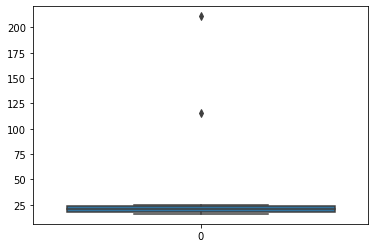

In [22]:
#outlier
sns.boxplot(data=df1['age'])
#so using the boxplot we can say that some outliers are present in age column

In [23]:
q1=df1['age'].quantile(0.25)
#25 percentile data

In [24]:
q3=df1['age'].quantile(0.75)
#75 percentile data

In [25]:
IQR=q3-q1
#inter quartile range

In [26]:
upper_limit=q3+(1.5*IQR)

In [27]:
lower_limit=q1-(1.5*IQR)

In [28]:
upper_limit,lower_limit
#upper limit for age is 33 and lower is 9 if we consider quantiles as 25 and 75 percentile data

(33.0, 9.0)

In [29]:
#so if we consider we can remove rows outside this range and those are outliers
df1[df1['age']<lower_limit]
#no outliers in lower limit of age

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source


In [30]:
df1[df1['age']>upper_limit]
#two outliers we can see in the upper limit of age,we can remove those


,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
17,USR1018,211,MALE,Hyderabad,Degree,IT Employee,social_media
300,USR1301,116,FEMALE,Hyderabad,Intermediate,Private Employee,social_media


In [31]:
#this is outliers data
outliers=df1[df1['age']>upper_limit]

In [32]:
df1_without_outlier=df1.drop(outliers.index,axis=0)

In [33]:
df1_without_outlier
#358 rows are now present so two outlier rows are removed

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media
1,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals
2,USR1003,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
3,USR1004,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
4,USR1005,16,MALE,Chennai,Intermediate,Government Employee,user_referrals
...,...,...,...,...,...,...,...
355,USR1356,21,MALE,Mumbai,Degree,Government Employee,user_referrals
356,USR1357,22,MALE,Chennai,Looking for Job,Government Employee,website
357,USR1358,25,MALE,Chennai,B.Tech,Government Employee,SEO
358,USR1359,18,FEMALE,Mumbai,B.Tech,Government Employee,email_marketing


In [34]:
df1_without_outlier[df1_without_outlier['current_education']=='B.Tech'].count()
#so 139 students out of total 358 were having Btech as current education

lead_id              139
age                  139
gender               139
current_city         139
current_education    139
parent_occupation    139
lead_gen_source      139
dtype: int64

In [35]:
df1_without_outlier.describe()
#The mean age of lead is 20.7
#75 percent of leads were under 24 years of age, they were quite young
#maximum age of lead is 25
#minimum age of lead is 16

,age
count,358.000000
mean,20.768156
std,2.852959
min,16.000000
25%,18.000000
50%,21.000000
75%,24.000000
max,25.000000


In [36]:
df1_without_outlier.corr()
#only one column is numerical so we can't use correlation

,age
age,1.0


In [37]:
df1_without_outlier.skew()
#negative value but close to zero means age distribution is not skewed and quite symmetric

age   -0.056952
dtype: float64

<AxesSubplot:xlabel='age', ylabel='Density'>

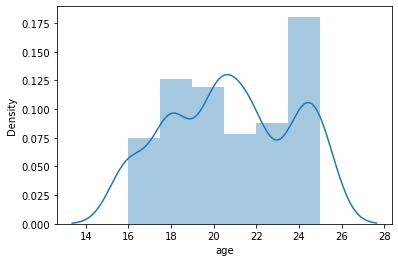

In [38]:
sns.distplot(df1_without_outlier['age'])
#as we can also see skewnees is not there in graph

In [39]:
df1_without_outlier.groupby('lead_gen_source').count()
#so if we see highest leads 85 were generated by social_media,so social media is most effective way of generating leads 

,lead_id,age,gender,current_city,current_education,parent_occupation
lead_gen_source,,,,,,
SEO,75,75,75,75,75,75
email_marketing,73,73,73,73,73,73
social_media,85,85,85,85,85,85
user_referrals,66,66,66,66,66,66
website,59,59,59,59,59,59


In [40]:
df1_without_outlier.groupby('parent_occupation').count()
#highest no. of leads generated was where the parent is a govt employee,so students whose parent are govt employees can be targeted

,lead_id,age,gender,current_city,current_education,lead_gen_source
parent_occupation,,,,,,
Business,80,80,80,80,80,80
Doctor,11,11,11,11,11,11
Government Employee,128,128,128,128,128,128
IT Employee,70,70,70,70,70,70
Lawyer,44,44,44,44,44,44
Private Employee,14,14,14,14,14,14
Professor/Faculty,11,11,11,11,11,11


In [41]:
from scipy.stats import normaltest

In [42]:
df1_num=df1_without_outlier[num_col]

In [43]:
normaltest(df1_num['age'])
#p value is very small

NormaltestResult(statistic=101.29194490293682, pvalue=1.0109592113830694e-22)

In [44]:
p=normaltest(df1_num['age'])[1]

In [45]:
if p>0.05:
    print("The data is normally distributed")
else:
    print("Not normal distribution")
    
#so we can conclude that the age distribution is not normal.That means most of the students are in 16 to 25 range of age.

Not normal distribution


<AxesSubplot:xlabel='age', ylabel='Density'>

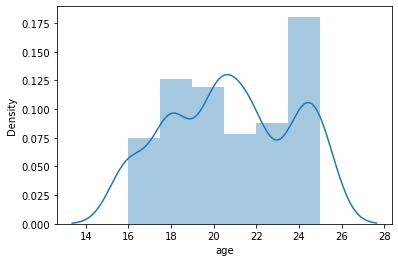

In [46]:
sns.distplot(df1_num['age'])

## Graphical analysis

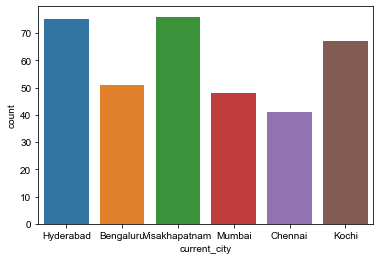

In [47]:
sns.countplot(df1_without_outlier['current_city'])
sns.set(rc={'figure.figsize':(11,5)})
#most leads were generated from vishakhapatnam as we can see from graph